# Project 1 - COVID-19 Data Analysis

**Project deadline:** This project is due for submission on Monday, 25.05.2020. You receive details on the submission process from your tutor!

**PLEASE READ THIS NOTEBOOK COMPLETELY BEFORE YOU START TO WORK ON THE PROJECT!**

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignmentts, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We aim to hand-out six projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The projects need to be submitted to your tutor and he will give you necessary information on the submission process!
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you must not use code or code-parts from your student peers in your project solutions!**

**Note: The tutors, Oliver and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!**

## Analysis of public COVID-19 data

In this first project, we would like to demonstrate that you can do advanced data analysis already with your current knowledge and with just a few lines of `Python`-code. Nevertheless the notebook contains some more advanced technical aspects to load data from the WWW and to prepare them for further analysis. Please do not worry if you do not fully understand all details of that part right now. We will cover those aspects later in the term.

We will do this project with a topic concerning all of us the moment, the COVID-19 pandemy. We will download publicly available data with a daily listing of new (known!) COVID-19 cases and new deaths due to the pandemy. The data set contains information on *all* countries with known COVID-19 cases. Your task will be to analyse the development of the pandemy and to check which countries currently do have a raising number of infectious COVID-19 patients.

The data that we will use in this notebook are daily updated and published by the [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide).

In [239]:
# We need some modules (Python libraries) in the following.
# Usually, such modules are loaded in the first cell of a notebook.
# The modules that we need concern loading the data and plotting
# them later.

# all plots should appear directly within the notebook
%matplotlib inline

# modules necessary for plotting
import matplotlib.pyplot as plt

# seaborn just makes plots look a bit nicer - not
# absolutely necessary though.
import seaborn as sns
sns.set_style("whitegrid")

# modules to load the data. The Pandas module
# is just needed for a quick data-loading demonstration at the
# start of the Notebook. The corona_data module is self-made
# to comfortably load and administrate the COVID-19 data.
# To work correctly, a file named 'corona_data.py' must be
# in the same directory as this notebook file!
import pandas as pd
import corona_data

# module to make avilable data structures and routines
# for numerics
import numpy as np

## Loading data

### Data-loading demo with standard Python-modules

One great feature of `Python` is the ability to load all kinds of standardised data-formats into memory - in most cases with a single command. The data can be located on your disk or on the Web. In the following, we directly load data from [this Web-address](https://opendata.ecdc.europa.eu/covid19/casedistribution/csv) (no need to separately download them).

In [240]:
# load COVID-19 data from the WEB with the pandas-modult
data = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/', engine="python")

# Uncomment the following line if you want to see all lines
# (more than 15000) and not only 10:
#pd.set_option('display.max_rows', None)
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,25/05/2020,25,5,2020,584,2,Afghanistan,AF,AFG,37172386.0,Asia
1,24/05/2020,24,5,2020,782,11,Afghanistan,AF,AFG,37172386.0,Asia
2,23/05/2020,23,5,2020,540,12,Afghanistan,AF,AFG,37172386.0,Asia
3,22/05/2020,22,5,2020,531,6,Afghanistan,AF,AFG,37172386.0,Asia
4,21/05/2020,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
19243,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
19244,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
19245,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
19246,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


The data lists among other quantities:
- first column (dateRep): (reported) date
- fifth column (cases): new confirmed COVID-19 cases at that date
- sixth column (deaths): new deaths because of COVID-19 at that date
- seventh column (countriesAndTerritories): country

The file lists all data from the 31st of December 2019 up to-date for all countries with known COVID-19 cases. Which countries are listed? Such information can be retrieved easily and quickly.

In [241]:
# list all countries reported in the data:
#
# The following line ensures that each country is reported once and that
# the resulting list is sorted:
countries = sorted((set(data['countriesAndTerritories'])))

# we only print 5 countries as the list is very long. Just remove the brackets
# if you want the full list:
#countries[0:3]


### Data-loading for our project

Although the above data-format can be used efficiently, it requires a longer sequence of commands to retrieve interesting time-sequence data for specific countries. Because we do not want to deal with those data-handling issues at the moment, I transfered this part of the code to a module `corona_data`. It reads the data and extracts the columns *cases* and *deaths* for a specific country. Furthermore, it removes all data before the 1st of March 2020. This date, we consider our *Day Zero* of the pandemy henceforth.

In [242]:
# first read all the data into an own Corona class structure. This only
# needs to be done only once within this notebook!
corona = corona_data.CoronaData()

# The countries listed are accessed as member variable of the Corona class.
# We do not need them immediately but it comes in handy for your own tasks
# below.
countries = corona.countries


In [243]:
# now isolate interesting data for a specific country
#countries = corona.countries
country = 'Germany'

# The structure 'corona[country]' contains a triple of numpy-arrays
# with days, cases and deaths. We assign them to three variables
# with 'simultaneous assignment'.
day, cases, deaths = corona[country]

print(day)
print(cases)
print(deaths)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
[  54   18   28   39   66  138  284  163   55  237  157  271  802  693
  733 1043 1174 1144 1042 5940 4049 3276 3311 4438 2342 4954 5780 6294
 3965 4751 4615 5453 6156 6174 6082 5936 3677 3834 4003 4974 5323 4133
 2821 2537 2082 2486 2866 3380 3609 2458 1775 1785 2237 2352 2337 2055
 1737 1018 1144 1304 1478    0 2584  793  679  685 1037 1194 1209 1251
  667  357  933  798  933  913  620  583  342  513  797  745  460  638
  431  289]
[  0   0   0   0   0   0   0   0   0   2   0   1   2   0   3   4   1   0
   0  30   2  22  27  32  23  49  55  72  64  66 128 149 140 145 141 184
  92 173 254 246 266 171 129 126 170 285 315 299 242 184 110 194 281 215
 227 179 140 110 163 202 173   0 287  74  43 139 165 123 147 103  26  22
 116 10

The three arrays have the following intuitive meaning: At day 0 (1st of March 2020), 54 new COVID-19 infections and zero new deaths were reported from Germany and so on. 

We now can make a first plot with the new cases against the day.

Text(0.5, 1.0, 'Daily COVID-19 infections in Germany')

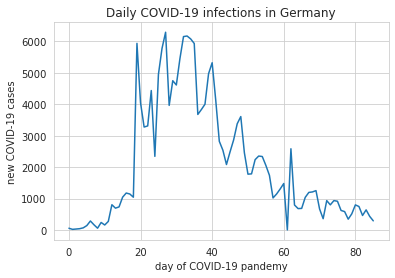

In [244]:
# The following command alone is sufficient to create the plot
plt.plot(day, cases)

# The following commands label the axes and the plot
plt.xlabel('day of COVID-19 pandemy')
plt.ylabel('new COVID-19 cases')
plt.title('Daily COVID-19 infections in Germany')

## Your tasks

**Note:** Please continue this notebook and do all the following tasks within that notebook. Please comment appropriately all code-blocks and perform the necessary discussions of your results in Markup cells. All plots must have appropriate axes-labels and a title! Your project submission will consist of the modified notebook.

The plot that we just created tells us that *new* infections have a decreasing trend. But to understand better the current state of the pandemy, we want to look at additional quantities.

1. Plot the *total accumulated number* of COVID-19 cases against the day. Give a short discussion on that plot. What kind of curve do you expect for a pandemy that can spread freely?  What effect do the current measures and restrictions in Germany (e.g. social distancing) have on the curve? Discuss this with the knowledge that drastic limitations on our life (closure of schools etc.) took effect in Germany on the 16th of March. What will the curve look like when the pandemy is over?
   
   **Hint:** Have a look at the `numpy` `cumsum`-function.
   
2. A very important quantity to decide whether current measures to confine the pandemy can be relaxed is the *development of the number of people who still can infect others (the infectious population)*. The main purpose of all COVID-19 restrictions is to realise a decreasing trend of that number! This quantity can be obtained by *the number of infected people minus those who died and minus those who recovered from COVID-19*. It is implicitely assumed in the following that recovered patients are immune against COVID-19.

   From the required information *only* the number of dead people is certain. The number of infected people is uncertain because we only have *reported* cases and we do not know how many people are infected but were not (yet) tested. Even more uncertain is the number of recovered patients and we entirely rely on an estimate for it. Furthermore, there are *many* definitions of *recoverd patients* around. The one coming closest to our procedure is the following: *A patient recovers if there are no symptoms 14-days after she was tested positively or after she left hospital.*
   
   Lacking further information, we define (overestimate) the number of recovered persons as follows: We consider everybody recovered who was positively tested more than 13-days ago and did not die.    
   Given these assumptions, create a plot of the infectious population as a function of pandemy-day for Germany. Discuss that plot. Assuming, the government withdrew all CVID-19 restrictions today and people immediately behaved as before the crisis, how long would it take until the number of infectious patients reaches again its all-time maximum?
   
   **Hint:** `numpy` array-slicing!
   
3. Create a loop over all countries with confirmed COVID-19 cases - see the hint below. List those countries who currently still have a *raising* infectious population. Limit the analysis to countries with more than 5000 confirmed COVID-19 cases.

   **Hint:** A raising infectious population means (for us) that the *derivative* of the plot from task (2) is positive today. 
   
**Note:** I include sample plots for tasks 1 and 2 from the 28th of March to the materials of this project. This allows you to verify your solution.   

In [245]:
# Hint to create a loop over all countries.
#
# The countries of known COVID-19 cases are stored in a so-called list.
# A Python-list is, as the numpy-arrays, a container (in that case of strings)
# whose elements can be accessed and iterated over in a very similar way:
#for country in countries:
    #print(country)

[    54     72    100    139    205    343    627    790    845   1082
   1239   1510   2312   3005   3738   4781   5955   7099   8141  14081
  18130  21406  24717  29155  31497  36451  42231  48525  52490  57241
  61856  67309  73465  79639  85721  91657  95334  99168 103171 108145
 113468 117601 120422 122959 125041 127527 130393 133773 137382 139840
 141615 143400 145637 147989 150326 152381 154118 155136 156280 157584
 159062 159062 161646 162439 163118 163803 164840 166034 167243 168494
 169161 169518 170451 171249 172182 173095 173715 174298 174640 175153
 175950 176695 177155 177793 178224 178513]


Text(0.5, 1.0, 'Total accumulated cases in Germany')

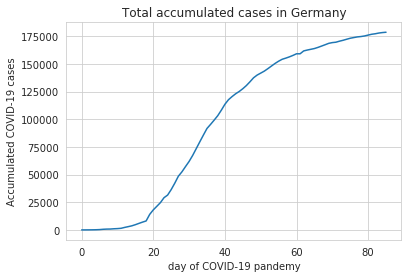

In [246]:
#corona = corona_data.CoronaData()
#countries = corona.countries
#day, cases, deaths = corona[country]

tot_c=np.zeros((len(cases)), dtype=int) # total no. of cases in integer format
j=0
while j < len(cases):   # loop to caculate the total no. of accumulated COVID -19 cases in Germany
    tot_c[j]=cases[j] + tot_c[j-1]
    j =j+1
print(tot_c)
plt.plot(day, tot_c)
plt.xlabel('day of COVID-19 pandemy')
plt.ylabel('Accumulated COVID-19 cases')
plt.title('Total accumulated cases in Germany')


In [247]:
np.cumsum(cases) #same stuff tells us about the cumulative no. of cases in Germany

array([    54,     72,    100,    139,    205,    343,    627,    790,
          845,   1082,   1239,   1510,   2312,   3005,   3738,   4781,
         5955,   7099,   8141,  14081,  18130,  21406,  24717,  29155,
        31497,  36451,  42231,  48525,  52490,  57241,  61856,  67309,
        73465,  79639,  85721,  91657,  95334,  99168, 103171, 108145,
       113468, 117601, 120422, 122959, 125041, 127527, 130393, 133773,
       137382, 139840, 141615, 143400, 145637, 147989, 150326, 152381,
       154118, 155136, 156280, 157584, 159062, 159062, 161646, 162439,
       163118, 163803, 164840, 166034, 167243, 168494, 169161, 169518,
       170451, 171249, 172182, 173095, 173715, 174298, 174640, 175153,
       175950, 176695, 177155, 177793, 178224, 178513])

(0, 50000)

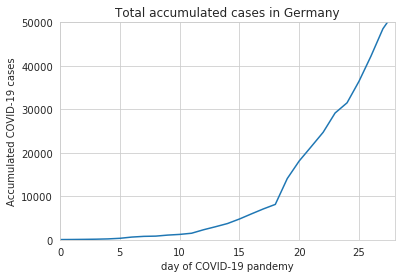

In [248]:
#Verification of the plot with the one given by THOMAS
plt.plot(day, np.cumsum(cases))
plt.xlabel('day of COVID-19 pandemy')
plt.ylabel('Accumulated COVID-19 cases')
plt.title('Total accumulated cases in Germany')
plt.xlim(0,28)
plt.ylim(0, 50000)

#### In the above plot, there is a subsequent growth in the number of cases with each passing day but after some time the number of new cases have reduced substantially due to preventive measures taken by the public and the government.

#### From the above plot of total cumulative cases v/s day we can clearly see that in the beginning there is an exponential growth in case numbers which can generally be expected when an infectious disease spreads unhindered.

#### Over time with social distancing or government measures such as curfew, it led to fewer and fewer contacts between infected and non-infected persons, which led to a temporal decrease in the so-called reproduction rate which is clear from the plot above as it is tending to get flatter with time.
#### When the pandemy gets over, the above plot will become flat i.e. the derivative of the plot will be zero.

(array([39]),)
[     54     126     226     365     570     913    1540    2330    3175
    4255    5492    6999    9306   12306   15990   20699   26554   33514
   41450   55188   72691   93307  117179  145252  175510  210451  250370
  295890  344642  397102  453003  513213  578537  644095  711686  781937
  852554  922567  994241 1065935 1137172 1206248 1274180 1339898 1403083
 1463301 1520229 1574363 1626024 1674207 1720488 1764720 1807186 1847030
 1883888 1918668 1952364 1984541 2015780 2045837 2074506 2099795 2124059
 2146658 2168161 2188564 2207767 2225812 2242729 2258842 2273885 2288267
 2302438 2316103 2329223 2343256 2355325 2367184 2378706 2390056 2401166
 2411827 2421739 2431038 2440101 2449096]
[   54    72   100   139   205   343   627   790   845  1080  1237  1507
  2307  3000  3684  4709  5855  6960  7936 13738 17503 20616 23872 28073
 30258 34941 39919 45520 48752 52460 55901 60210 65324 65558 67591 70251
 70617 70013 71674 71694 71237 69076 67932 65718 63185 60218 56928 

Text(0.5, 1.0, 'Total no. of infected people in Germany')

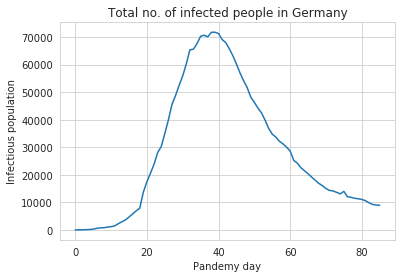

In [249]:
#First of all i begin with defining the COVID-19 infected people as a function of day, cases and death
def func(day, cases, deaths):
    overestimate=np.zeros(len(day), dtype=int) # I create an array to save the data of no. of recovered people
    infected_estimate=np.zeros(len(day), dtype=int) #I create an array to save the data of no. of infected people
     # we now make a loop in order to calculate the no. of infected people.  we will begin by eliminating people who have recovered and those who have died.
    for j in range(14, len(day)):
        if (j==14):
             overestimate[j]=cases[j-14] - np.cumsum(deaths)[j]  
        else:
            overestimate[j]=cases[j-14] - deaths[j]
        j+=1
    infected_estimate= np.cumsum(cases) - np.cumsum(overestimate) - np.cumsum(deaths) # remaining infected population
    return infected_estimate
y=func(day, cases, deaths)# array  with data of an estimate of  infected population
print(np.where(y == max(y))) # to find how many days it took the no. of infected population to reach the maximum point
print(np.cumsum(y))
print(y)
plt.plot(day, y)
plt.xlabel('Pandemy day')
plt.ylabel('Infectious population')
plt.title('Total no. of infected people in Germany')


#### According to the plot, there is a subsequent rise in the number of infected people until it reaches a maximum (in case of Germany took 39 days) and due to various precautions taken, the curve falls indicating the fact that the number of infected population decreased.


#### If infection leads to immunity, successful social distancing also means  that more people remain susceptible to the disease. As a result, once we lift the social distancing measures, the virus will quite possibly spread again as easily as it did before the lockdowns.

#### The pandemic wave, similarly, will be with us for the foreseeable future before it diminishes.  But, depending on one’s geographic and the policies in place, it will exhibit variegated dimensions and dynamics traveling through time and space. We must be prepared for at least another  18 to 24 months of significant Covid-19 activity, with hot spots popping up periodically in diverse geographic areas.

(0, 50000)

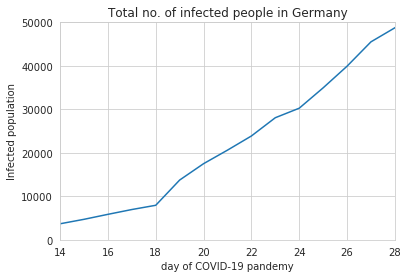

In [250]:
#Verification of the plot with the one provided by Thomas....
plt.plot(day, y)
plt.xlabel('day of COVID-19 pandemy')
plt.ylabel('Infected population')
plt.title('Total no. of infected people in Germany')

plt.xlim(14,28)
plt.ylim(0, 50000)

In [251]:
corona = corona_data.CoronaData()
countries = corona.countries

for i in countries:
    day, cases, deaths=corona[i]
    if cases.sum() >= 5000: # loop to calculate no. of countries where total no. of cases is more than 5000
        #print(i)
        day, cases, deaths=corona[i]
        y=func(day, cases, deaths)
        #print(y)
        dy_dx=y[1:]-y[:-1]/(day[1:]-day[:-1]) # calculation of the derivative of the infected people vs pandemy day plot for last day 
        #print(dy_dx)
        #xx=(day[1:]+day[:-1])/2
        #dy_dx1=(dy_dx[-1:])-(dy_dx[len(dy_dx)-2])
        #print(y)
        a=dy_dx[-1:]# the last element of the array dy_dx
        if a > 0:
            print(i) # This will print the countries with positive derivative of plot i.e. those which still have raising infection
        

Afghanistan
Algeria
Argentina
Armenia
Austria
Bahrain
Bangladesh
Belarus
Bolivia
Brazil
Chile
Colombia
Czechia
Ecuador
Egypt
Ghana
India
Indonesia
Iran
Israel
Kazakhstan
Mexico
Moldova
Nigeria
Oman
Pakistan
Panama
Peru
Philippines
Poland
Qatar
Saudi_Arabia
South_Africa
United_States_of_America


#### The List of countries having a raising infectious population  